In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [71]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [72]:
plt.rcParams['figure.figsize'] = (12,6)
sns.set(style="whitegrid")

In [73]:
df = pd.read_csv("unemployment in india.csv")

In [74]:
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [76]:
print(df.isnull().sum())


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [77]:
df.dropna(inplace=True)


In [78]:
print(len(df))


740


In [79]:
print(df.columns.tolist())


['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']


In [80]:
df.columns = df.columns.str.strip()


In [81]:
# Remove leading/trailing spaces
df['Date'] = df['Date'].str.strip()

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [82]:
print(df.describe())


                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                                38.062500

In [83]:
df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()


Date
2019-05-31     8.874259
2019-06-30     9.303333
2019-07-31     9.033889
2019-08-31     9.637925
2019-09-30     9.051731
2019-10-31     9.900909
2019-11-30     9.868364
2019-12-31     9.497358
2020-01-31     9.950755
2020-02-29     9.964717
2020-03-31    10.700577
2020-04-30    23.641569
2020-05-31    24.875294
2020-06-30    11.903600
Name: Estimated Unemployment Rate (%), dtype: float64

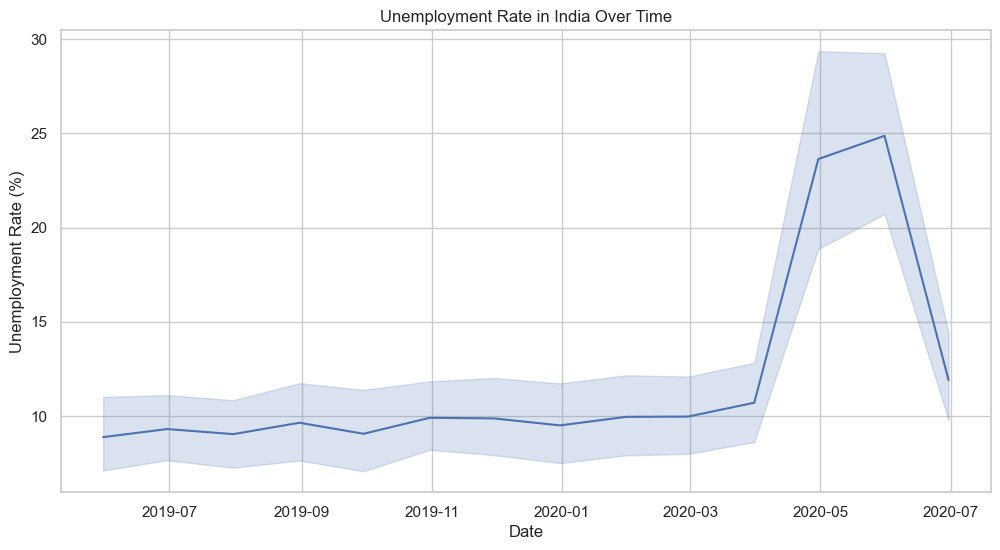

In [84]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


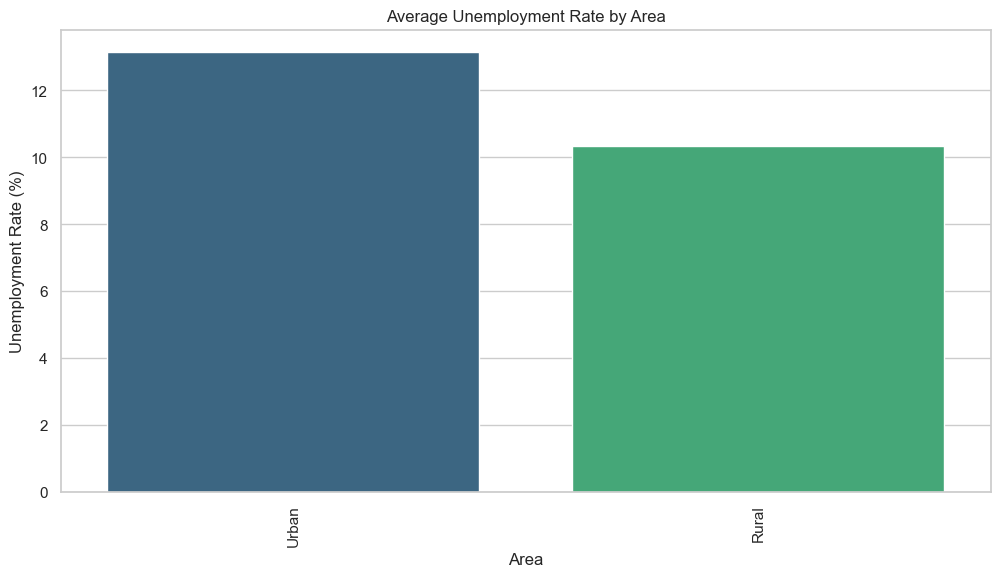

In [85]:
plt.figure(figsize=(12,6))
area_avg = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
sns.barplot(x=area_avg.index, y=area_avg.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()


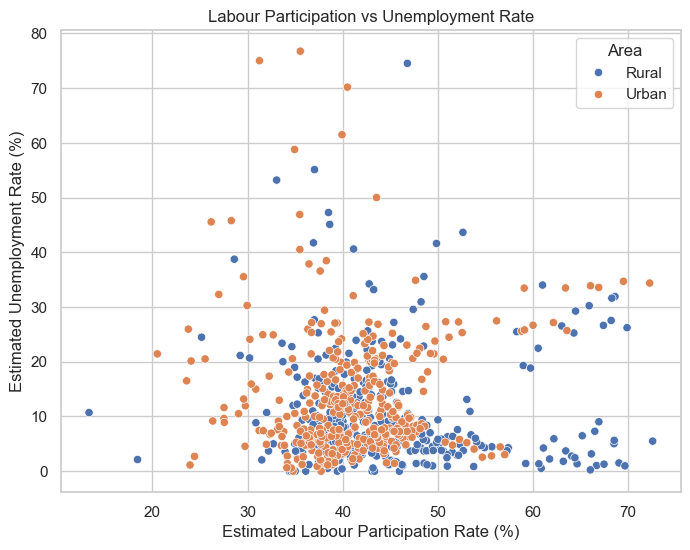

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', hue='Area')
plt.title("Labour Participation vs Unemployment Rate")
plt.show()


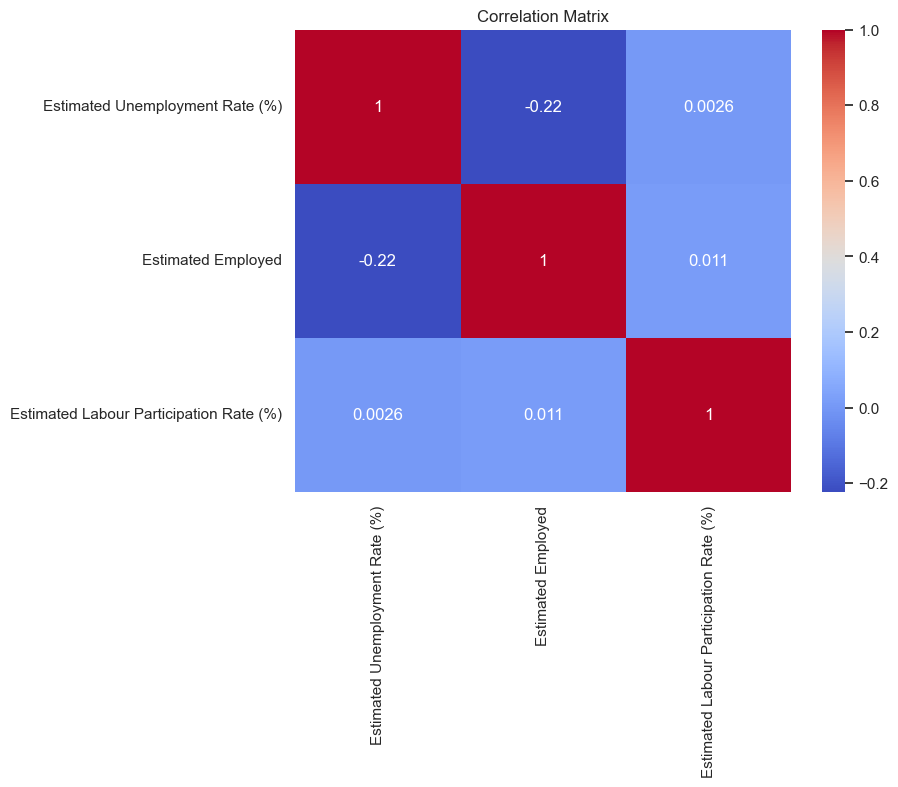

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [88]:
print(df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10))  # top 10
print(df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().sort_values().head(10))  # bottom 10


Area
Urban    13.166614
Rural    10.324791
Name: Estimated Unemployment Rate (%), dtype: float64
Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate (%), dtype: float64


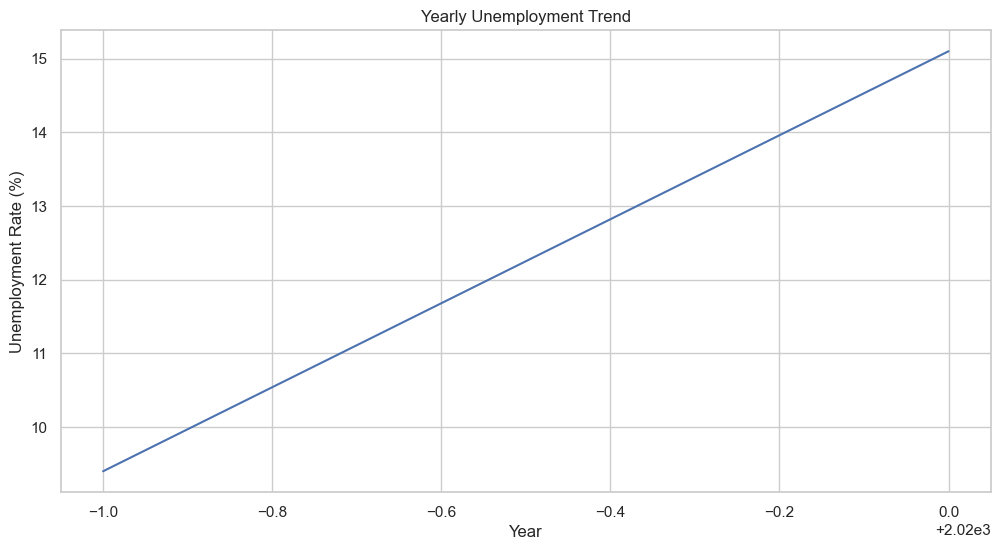

In [89]:
df['Year'] = df['Date'].dt.year
yearly_trend = df.groupby('Year')['Estimated Unemployment Rate (%)'].mean()
yearly_trend.plot(kind='line', title="Yearly Unemployment Trend", ylabel="Unemployment Rate (%)")
plt.show()


In [101]:
# Cell: simple linear regression on time index to forecast a short horizon
# Create numeric time feature
df_lr = df[['Date','Estimated Unemployment Rate (%)']].dropna().copy()
df_lr['time_idx'] = (df_lr['Date'] - df_lr['Date'].min()).dt.days  # days since start



In [102]:
train_size = int(len(df_lr) * 0.8)
train = df_lr.iloc[:train_size]
test = df_lr.iloc[train_size:]

model = LinearRegression()
model.fit(train[['time_idx']], train['Estimated Unemployment Rate (%)'])
pred_test = model.predict(test[['time_idx']])

print("MAE:", mean_absolute_error(test['Estimated Unemployment Rate (%)'], pred_test))
print("R2:", r2_score(test['Estimated Unemployment Rate (%)'], pred_test))


MAE: 7.831656436149208
R2: 0.07158806736477574


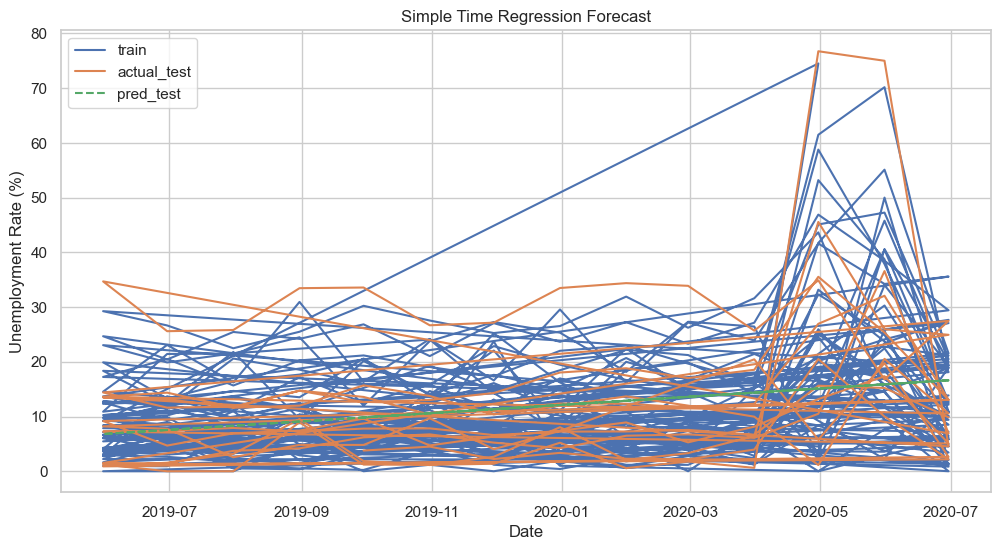

In [104]:
plt.figure()
plt.plot(train['Date'], train['Estimated Unemployment Rate (%)'], label='train')
plt.plot(test['Date'], test['Estimated Unemployment Rate (%)'], label='actual_test')
plt.plot(test['Date'], pred_test, label='pred_test', linestyle='--')
plt.title("Simple Time Regression Forecast")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

In [105]:
last_date = df_lr['Date'].max()
future_days = [last_date + pd.DateOffset(months=i) for i in range(1,7)]
# convert future to time_idx using days since start
future_idx = np.array([(d - df_lr['Date'].min()).days for d in future_days]).reshape(-1,1)
future_pred = model.predict(future_idx)
pd.DataFrame({'Date': future_days, 'Predicted Unemployment Rate': future_pred})

,Date,Predicted Unemployment Rate
0,2020-07-30,17.367629
1,2020-08-30,18.136525
2,2020-09-30,18.905422
3,2020-10-30,19.649515
4,2020-11-30,20.418411
5,2020-12-30,21.162505
